In [58]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=1000, n_features=100, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [100]:
import math

class AdamLinreg:
    def __init__(self, learning_rate:float=0.001, decay_rates:tuple=(0.9, 0.999)) -> None:
        self.learning_rate = learning_rate
        self.decay_rates = decay_rates
        self.epsilon = 10**(-8)
        
        self.losses = np.array([], dtype=float)
    
    def init_weights(self, n_features:int) -> None:
        self.weights = np.zeros(n_features, dtype=float)

        self.m_moments = np.zeros((1, n_features), dtype=float)
        self.v_moments = np.zeros((1, n_features), dtype=float)
        
    def calculate_grads(self, x:list[float], y:float, target:float) -> list[float]:
        return np.array([2 * (y - target) * x[i] for i in range(len(x))])
    
    def calculate_moments(self, x:list[float], y:float, target:float, n_iter:int) -> tuple[float]:
        m = np.zeros_like(self.m_moments[0], dtype=float)
        v = np.zeros_like(self.v_moments[0], dtype=float)
        grads = self.calculate_grads(x, y, target)
        
        for i in range(grads.shape[0]):
            m[i] = self.decay_rates[0] * self.m_moments[-1][i] + (1 - self.decay_rates[0]) * grads[i]
            v[i] = self.decay_rates[1] * self.v_moments[-1][i] + (1 - self.decay_rates[1]) * grads[i]**2

        corrected_m = m / (1 - self.decay_rates[0]**n_iter) 
        corrected_v = v / (1 - self.decay_rates[1]**n_iter)
        
        self.m_moments = np.vstack((self.m_moments, corrected_m))
        self.v_moments = np.vstack((self.v_moments, corrected_v))

        return corrected_m, corrected_v
    
    def train(self, X:np.ndarray, y:np.ndarray) -> None:
        self.init_weights(X.shape[1])
        
        for epoch in range(1):
            
            for i in range(X.shape[0]):
                pred = self.predict(X[i])
                loss = (y[i] - pred)**2

                self.losses = np.append(self.losses, loss)

                m, v = self.calculate_moments(X[i], pred, y[i], i)
                for j in range(self.weights.shape[0]):
                    self.weights[j] -= self.learning_rate * m[j] / (math.sqrt(v[j]) + self.epsilon)
            print(f'epoch {epoch} finished')
            
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        return np.dot(X, self.weights)

In [102]:
#TODO: momentum calculations fuck up from second iteration 
linreg = AdamLinreg()
linreg.train(X_train, y_train)

epoch 0 finished


/var/folders/1s/tsdn68ps7_sc32ggkmy293y80000gn/T/ipykernel_12920/3659384610.py:29: RuntimeWarning: divide by zero encountered in divide
  corrected_m = m / (1 - self.decay_rates[0]**n_iter)
/var/folders/1s/tsdn68ps7_sc32ggkmy293y80000gn/T/ipykernel_12920/3659384610.py:30: RuntimeWarning: divide by zero encountered in divide
  corrected_v = v / (1 - self.decay_rates[1]**n_iter)
/var/folders/1s/tsdn68ps7_sc32ggkmy293y80000gn/T/ipykernel_12920/3659384610.py:50: RuntimeWarning: invalid value encountered in double_scalars
  self.weights[j] -= self.learning_rate * m[j] / (math.sqrt(v[j]) + self.epsilon)


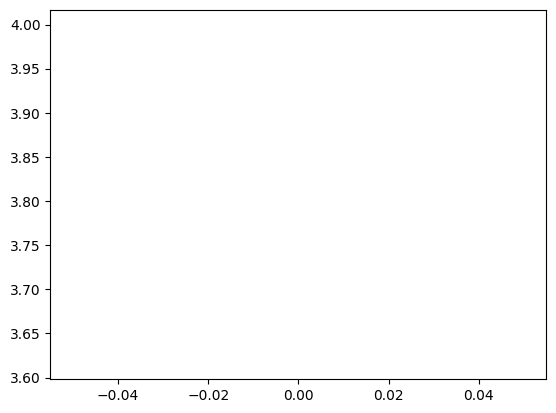

In [91]:
import matplotlib.pyplot as plt

plt.plot(linreg.losses);

In [78]:
linreg.weights.shape[0]

100